# 1. 회귀를 활용하여 캘리포니아 주택가격 예측
## 1-1. 예측에 활용할 데이터 설명 
- **MedInc**: 해당 지역의 중간 소득 (단위는 만 달러입니다.)
- **HouseAge**: 해당 주택 구역의 평균 연식
- **AveRooms**: 가구당 평균 방 개수
- **AveBedrms**: 가구당 평균 침실 개수
- **Population**: 해당 지역의 인구 수
- **AveOccup**: 가구당 평균 인원수
- **Latitude**: 해당 지역의 위도
- **Longitude**: 해당 지역의 경도

➡️ <u>**보통 Column, feature, 특성, 독립변수라고 부릅니다.**</u>
## 1-2. 예측 대상 데이터 설명
- **Price**: 해당 지역의 중간 주택 가격 (단위는 만 달러입니다.)

➡️ <u>**보통 target, 종속변수라고 부릅니다.**</u>

### 📌 코드 설명
* 5줄 : 1줄에서 sklearn.datasets 라이브러리 안에 있는 fetch_california_housing 데이터를 california 변수에 선언
* 6줄 : 데이터가 담긴 변수인 california에서 feature만 가져와 X 변수에 선언
* 7줄 : 데이터가 담긴 변수인 california에서 target만 가져와 y 변수에 선언
* 9, 10줄 : head() 함수를 통해 X, y 변수의 데이터를 5개씩만 출력해보기

In [12]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="Price")

print(X.head())
print(y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


### 📌 코드 설명
* 1줄 : california 데이터셋의 feature가 담긴 X 변수 호출하여 데이터 확인

In [13]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### 📌 코드 설명
* 1줄 : info() 함수를 사용하여 X 데이터의 각 feature 명, 결측치 수, 데이터 타입을 확인

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


### 📌 코드 설명
* 1줄 : 위와 동일하게 info() 함수를 사용하여 y 데이터의 정보 확인

In [15]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


# 2. 데이터 전처리
## 2-1. 이상치(outliers) 제거
* Boxplot을 활용하여 이상치와 정상 데이터를 분류하고 이상치를 제거하겠습니다.

### 🤔 개념 설명
### Boxplot
* **Median(=Q2)** : 파란 박스 안의 중앙 즉 데이터 분포의 50%를 뜻합니다.
* **Q1, Q2, Q3** : 데이터의 25%, 50%, 75%
* **IQR** : Q3 - Q1 (데이터의 75%의 값과 25%의 값의 차를 IQR이라 하고 이상치 범위를 나타내는 기준 역할을 합니다.
* **수염(Q3 + 1.5×IQR)** : 위 쪽 박스 밖 선을 뜻하며, 이 범위의 밖을 너무 큰 이상치(outliers)를 의미합니다.
* **수염(Q1 - 1.5×IQR)** : 아래 쪽 박스 밖 선을 뜻하며, 이 범위의 밖을 너무 작은 이상치(outliers)를 의미합니다.
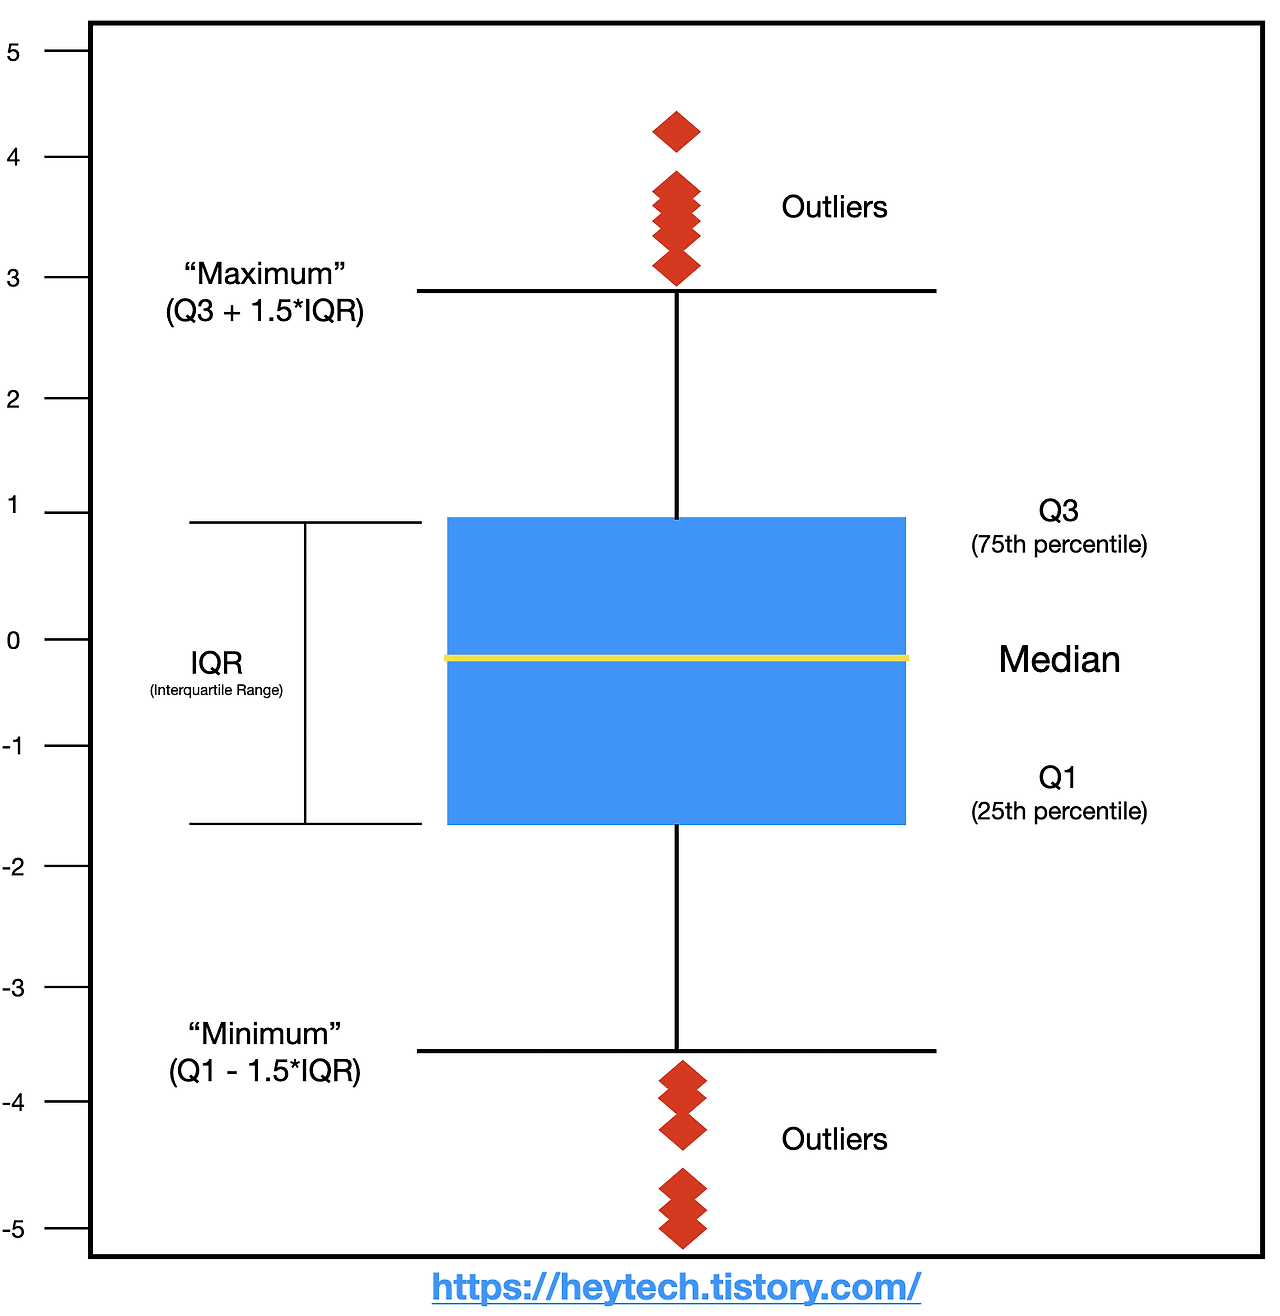

### 📌 코드 설명
* 1줄 : 데이터를 시각화 하기 위한 라이브러리인 matplotlib를 호출합니다. (matplotlib을 간단하게 plt라 부르겠습니다.)
* 2줄 : seaborn도 위와 동일하게 데이터 시각화를 위한 라이브러리 입니다. (seaborn을 간단하게 sns라고 부르겠습니다.)
* 5줄 : 시각화 할 그림의 크기를 설정하였습니다. figsize=(가로길이, 세로길이)
* 6줄 : 시각화 하고자 하는 데이터를 data=X로 정의하고 seaborn을 활용하여 boxplot을 그렸습니다.
* 7줄 : 시각화 한 그림을 보기위한 코드입니다.

➡️ <u>**다른 특성(feature)들은 이상치가 눈에 띄게 보이지 않지만 Population 특성(feature)은 많은 이상치가 있는 것을 확인할 수 있습니다.**</u>

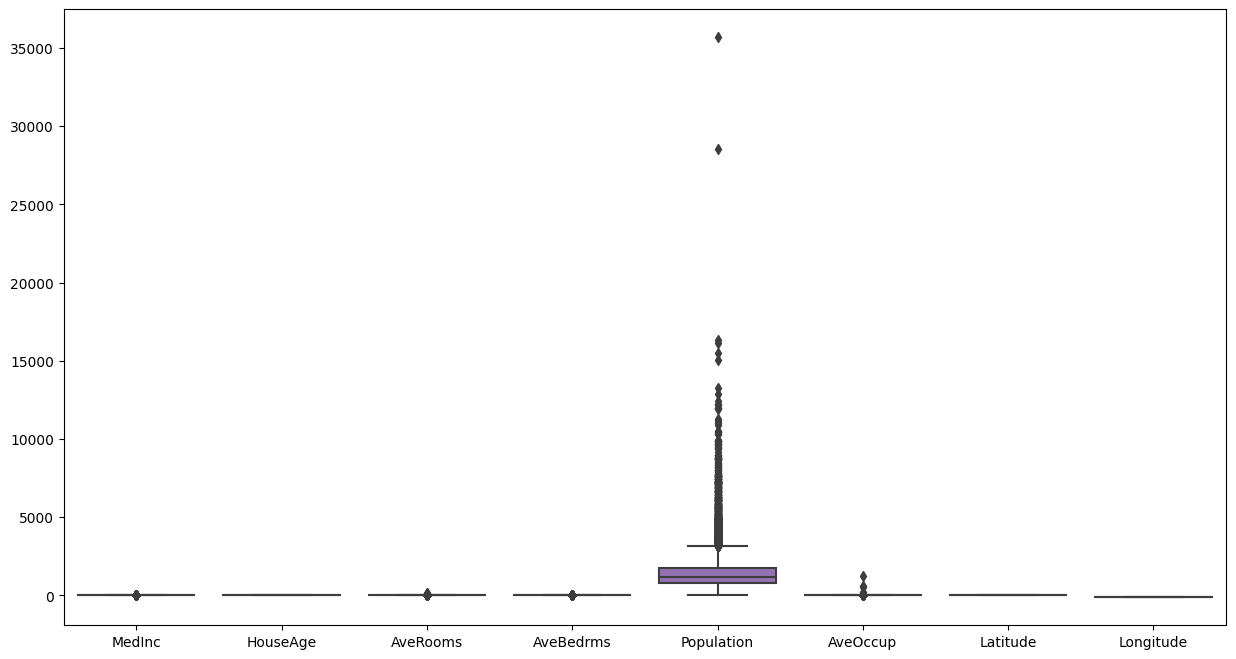

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 시각화 설정
plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.show()

### 📌 코드 설명
* 1줄 : 데이터를 다루기 위한 라이브러리인 pandas를 호출하고 pd라고 부르겠습니다.
* 4줄 : 이상치 제거 대상인 Population 특성의 Q1을 정의하였습니다. (데이터의 25% 값을 변수에 주었습니다.)
* 5줄 : 4줄과 동일하게 이상치 정의를 위해 Q3를 정의하였습니다. (데이터의 75% 값을 변수에 주었습니다.)
* 6줄 : 이상치 정의시 사용하는 IQR 값을 Q3 - Q1을 하여 정의하였습니다.
* 9줄 : IQR 범위를 벗어나는 이상치 감지 후 제거
* 12줄 : 제거된 이상치를 그 feature의 평균값으로 대체해주었습니다.
* 15줄 : 기존 Population 데이터의 Population 특성을 이상치 제거 후 평균값으로 채워준 데이터로 변경해주었습니다.
* 18, 19줄 : 기존 데이터 수와 이상치 제거 후 평균값으로 대체해준 데이터의 수가 동일한 것을 알 수 있습니다.

➡️ <u>이상치 제거 후 평균값으로 채워준 이유는 비어있는 값에 해당하는 모든 행의 데이터를 삭제해야 하기 때문에 이는 약 3700개의 데이터 손실이 있는 것입니다. 그렇기에 보통 제거된 값이나 비어있는 값을 평균값으로 변경하여 줍니다.</u>

In [26]:
import pandas as pd

# IQR 범위 계산
Q1 = X["Population"].quantile(0.25)
Q3 = X["Population"].quantile(0.75)
IQR = Q3 - Q1

# 이상치를 NaN으로 표시
X_outliers = X["Population"].mask((X["Population"] < (Q1 - 1.5 * IQR)) | (X["Population"] > (Q3 + 1.5 * IQR)))

# NaN 값을 각 feature의 평균값으로 대체
X_filled = X_outliers.fillna(X["Population"].mean())

# Population 값 변경
X["Population"] = X_filled

# 결과 확인
print("이상치 처리 전 데이터 크기:", X["Population"].shape)
print("이상치 처리 후 데이터 크기:", X_filled.shape)

이상치 처리 전 데이터 크기: (20640,)
이상치 처리 후 데이터 크기: (20640,)


### 📌 코드 설명
* 이전 boxplot 그림과 동일한 코드입니다.
* 제거된 이상치를 평균값으로 채운 것을 확인하기 위해 시각화한 코드입니다.

➡️ <u>population 데이터의 이상치 값이 평균값으로 대체되어 Population 특성의 이상치가 제거된 것을 확인할 수 있습니다. Population의 이상치가 없어지면서 AveOccup 특성도 이상치가 있는 것을 확인할 수 있게 되었습니다. 위와 동일하게 AveOccup의 이상치를 제거해주겠습니다.</u>

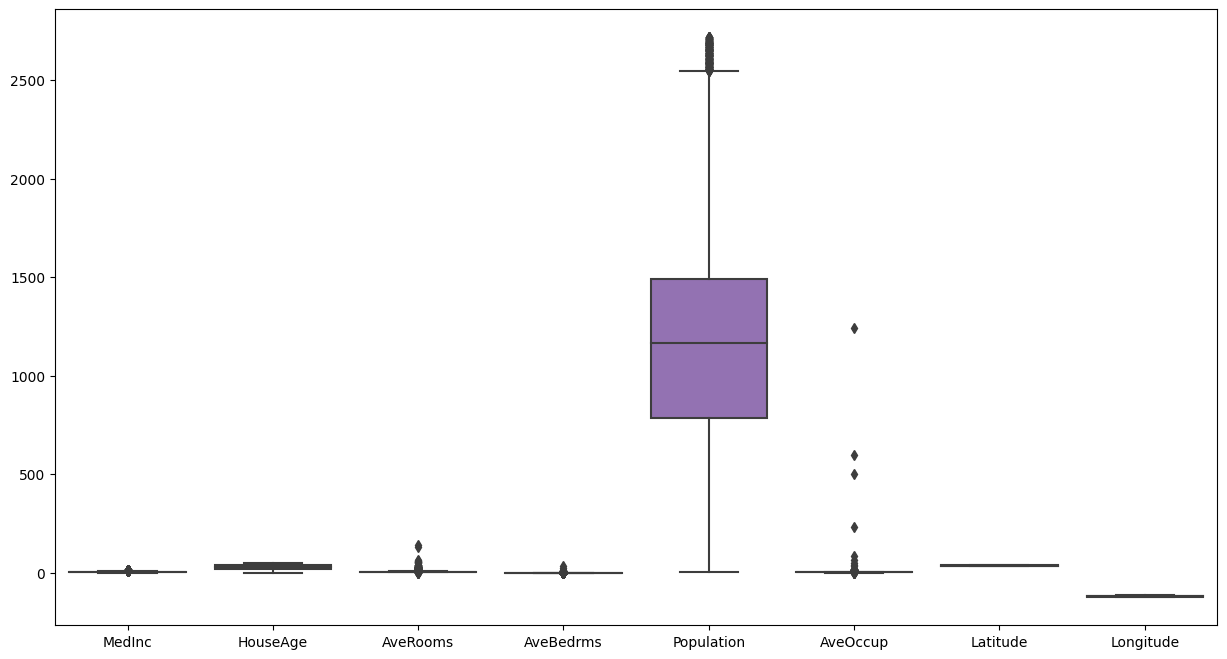

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 시각화 설정
plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.show()

### 📌 코드 설명
* 위의 이상치 제거 코드에서 이상치 제거하려는 특성명만 Population에서 AveOccup로 변경해주었습니다.

In [28]:
import pandas as pd

# IQR 범위 계산
Q1 = X["AveOccup"].quantile(0.25)
Q3 = X["AveOccup"].quantile(0.75)
IQR = Q3 - Q1

# 이상치를 NaN으로 표시
X_outliers = X["AveOccup"].mask((X["AveOccup"] < (Q1 - 1.5 * IQR)) | (X["AveOccup"] > (Q3 + 1.5 * IQR)))

# NaN 값을 각 feature의 평균값으로 대체
X_filled = X_outliers.fillna(X["AveOccup"].mean())

# Population 값 변경
X["AveOccup"] = X_filled

# 결과 확인
print("이상치 처리 전 데이터 크기:", X["AveOccup"].shape)
print("이상치 처리 후 데이터 크기:", X_filled.shape)

이상치 처리 전 데이터 크기: (20640,)
이상치 처리 후 데이터 크기: (20640,)


### 📌 코드 설명
* 이전 boxplot 그림과 동일한 코드입니다.
* 이는 이상치가 제거된 것을 평균값으로 채운 것을 확인하기 위해 시각화한 코드입니다.

➡️ <u>AveOccup 데이터의 이상치가 제거된 것을 확인할 수 있습니다.</u>

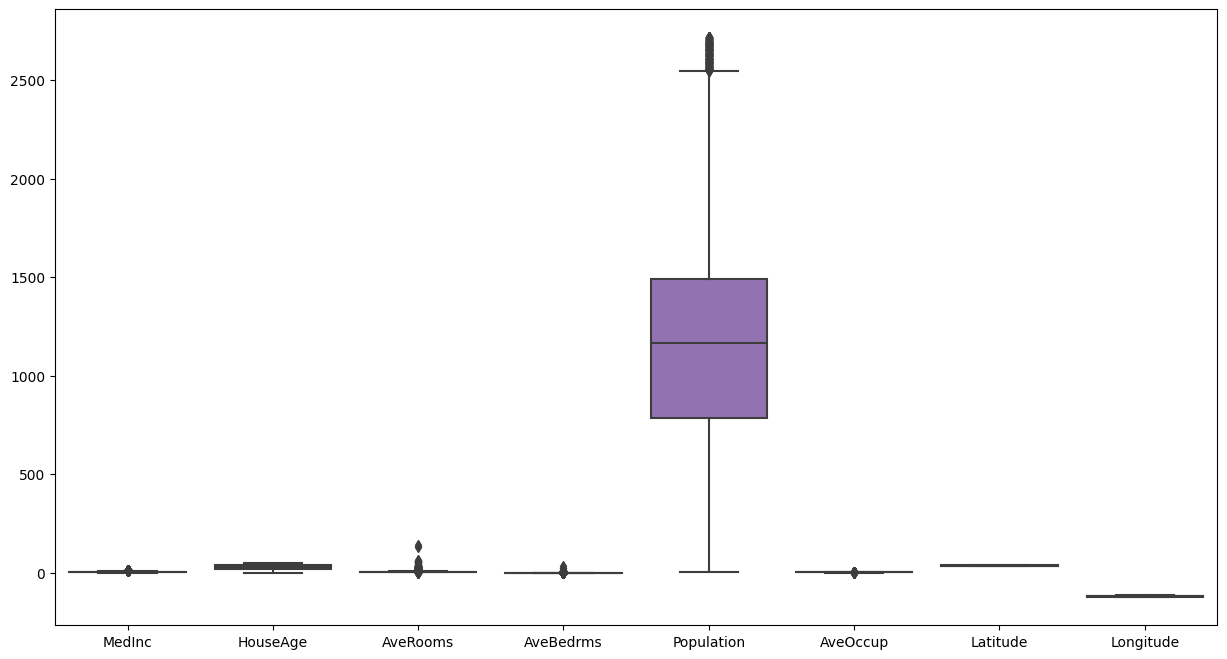

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 시각화 설정
plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.show()

## 2-2. 데이터의 단위 맞추기
* 위의 boxplot 시각화 자료를 보면 population 데이터만 단위가 너무 큰 것을 확인할 수 있습니다. 그렇기에 단위를 맞춰주는 작업을 **<span style="color: #2D3748; background-color:#fff5b1;"> 데이터 스케일링</span>**이라고 합니다.

### 2-2-1. 정규화 하지 않았을 때의 단점
1. feature들이 서로 다른 단위를 가지면, 모델이 특정 feature에 치우쳐 학습하게 되어 예측의 정확성이 떨어질 수 있습니다.
2. 선형회귀 모델을 학습할 때 feature 간의 단위가 다르면 최적값으로 수렴하는 속도가 매우 느려질 수 있습니다.

### 🤔 개념 설명
### 표준화(Standardization)
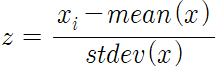
* 각 feature의 값들의 평균을 0, 분산을 1로 통일 시켜주는 스케일링 기법입니다.
* 어떤 특정 feature를 x라고 할 때 x의 원래 값에서 x의 평균을 뺀 값을 x의 표준편차로 나눈 값으로 계산할 수 있습니다.

➡️ <u>이 코드에서는 데이터 스케일링으로 Standardization이 사용되었지만 그 외에도 정규화(Normalization), MinMaxScaler, Robust 등이 있습니다.</u>

### 📌 코드 설명
* 1줄 : sklearn.preprocessing 라이브러리 안에 StandardScaler 함수를 호출하였습니다.
* 4줄 : scaler를 StandardScaler로 정의해주었습니다.
* 7줄 : 위의 이상치를 제거한 데이터 변수명인 X_filtered를 스케일링 해주고 X_scaled 변수에 선언하였습니다.

In [30]:
from sklearn.preprocessing import StandardScaler

# 스케일러 초기화
scaler = StandardScaler()

# 스케일러를 데이터에 맞춰 학습 및 변환 적용
X_scaled = scaler.fit_transform(X_filtered)

### 📌 코드 설명
* 위의 boxplot 그리는 코드에서 데이터 변수명만 변경해주었습니다.

➡️ <u>위의 boxplot을 보면 Population 특성의 단위가 너무 커 다른 특성들은 보기 힘들었는데 아래 boxplot을 보면 각 특성의 평균이 0, 분산이 1로 맞춰진 것을 확인할 수 있습니다.</u>

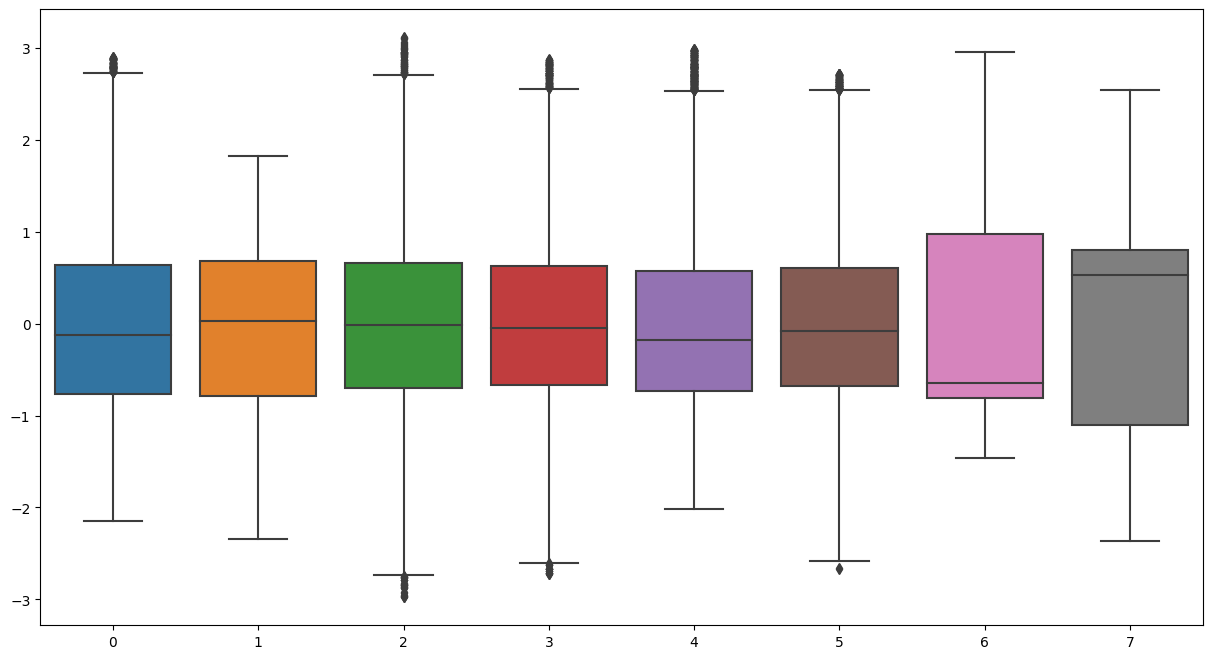

In [31]:
# 박스플롯 시각화 설정
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_scaled)
plt.show()

# 3. 학습을 위한 데이터 생성
## 3-1. 데이터 분리를 하는 이유
* train : 학습을 위한 데이터
* validation set : 학습이 이미 완료된 모델을 검증하기 위한 set (중간 점검)
* test set : 학습과 검증이 끝난 모델의 최종 성능 평가용


* **➡️ 모든 데이터를 train으로 주었을 때**
    * 모든 데이터를 train으로 주면 많은 데이터를 학습 시킬 수 있지만 학습시킨 데이터를 모델의 성능 평가에 사용하면 매우 높은 정확도를 보여줍니다. 이는 학습한 데이터에 대한 성능은 좋지만 새로운 데이터가 들어왔을 때 정확도가 높지 않습니다.


* **➡️ train, test로 나눴을 때**
    * 모델을 train으로 학습시키고 평가를 test 데이터로 진행할 수 있게되었습니다. 하지만 처음 만든 모델이 최적의 성능을 보장하지 않습니다. 그렇기에 데이터 전처리, 모델 변경을 통해 모델의 성능을 개선해 가야합니다. 하지만 test 데이터에 대해 모델의 성능을 개선했을 때 이 모델이 반드시 모든 데이터에 대해 좋은 성능을 낸다는 보장이 없습니다.


* **➡️ train, vallidation, test로 나눴을 때**
    * 모델을 train 데이터로 학습시키고 평가를 test 데이터로 진행합니다. 그리고 모델 성능 개선을 위한 데이터 전처리, 모델 변경 등의 작업을 수행하고 이 모델의 성능을 validation 데이터로 평가함으로써 완전히 새로운 데이터을 만든 모델에 평가받아볼 수 있습니다. 이를 통해 새로운 데이터에도 강한 모델을 만들 수 있게됩니다.


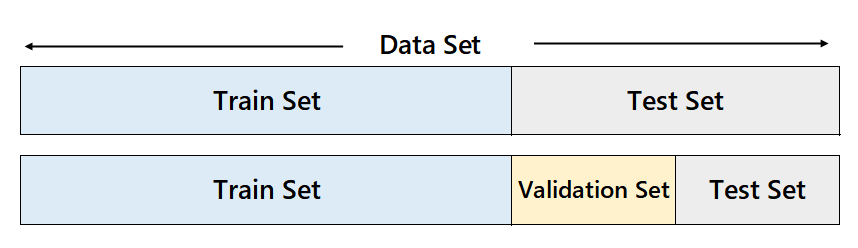

## 3-2. 데이터를 나누는 함수인 train_test_split 함수 parameter

### 코드 : <span style='background-color: #ffdce0'>train_test_split(data, data2, test_size, train_size, shuffle, random_state)</span>
* Scikit-Learn의 model_selection패키지는 데이터를 학습용(train)과 검증용(test)으로 분리시켜주는 명령어 train_test_split()을 제공합니다.


### 주요 parameter :

* data: 독립변수(X) 데이터
* data2: 종속변수(y) 데이터 --> data 인수에 종속변수(y)가 포함되어 있다면 생략 가능
* test_size: 검증용 데이터의 개수/비율 --> 1 이하의 실수일 경우 비율을 나타냄 (기본값 = 0.25)
* train_size : 학습용 데이터의 개수/비율 --> 1 이하의 실수일 경우 비율을 나타냄 (기본값 = 0.25), test_size와 train_size 중 하나만 사용 가능
* shuffle: 데이터 섞기 (기본값은 True)
* random_state: 난수 생성
* fit_intercept: y 절편(bias) 계산 여부, (기본 값 = True)
* normalize: 데이터 셋 정규화, (기본 값 = False)

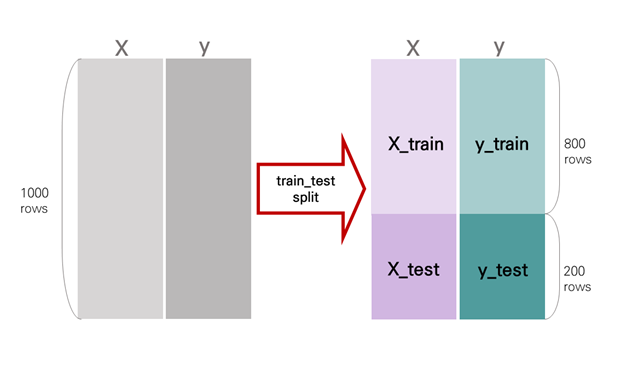

### 📌 코드 설명
* 2줄 : sklearn.model_selection 라이브러리의 train_test_split 함수 호출
* 4줄 : 전처리를 거친 데이터인 X(features)와 정답 데이터인 y(target)를 입력으로 주고 test 데이터의 크기를 전체 데이터의 20%로 설정하고 랜덤으로 데이터를 나눠주었습니다. (train data : X_train, y_train / test data : X_test, y_test)
    
    
➡️ <u>이번 프로젝트에서는 좋은 모델을 찾아가는 취지보다 데이터 전처리와 모델 코드를 이용해보는 것이 목적이라 생각하여 모델 성능 개선을 위한 validation data는 만들지 않았습니다.</u>

In [32]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

### 📌 코드 설명
* 2줄 : sklearn.linear_model 라이브러리에서 LinearRegresison 호출
* 4줄 : reg 변수에 LinearRegression 선언
* 6줄 : train_test_split 함수로 나눠놓은 train을 위한 데이터를 입력으로 주어 선형회귀 학습 진행

➡️ <u>선형회귀에 대한 설명은 <span style="color: #2D3748; background-color:#fff5b1;"> 전주대학교 최고의 교수님이신 권수태 교수님</span>께서 설명해주셨으니 넘어가겠습니다.</u>

In [33]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression   

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

# 4. 모델 성능 평가
## 4-1. 평균제곱오차(MSE)
* 모델의 예측값과 실제값의 차이를 절대값을 취해주고 모두 더한 값입니다.

➡️ <u>모델이 예측한 값과 실제값의 차이를 절대값을 취해주는 이유는 그 합의 크기를 비교하기 위해서 입니다. 만약 절대값이 없다면 MSE값이 0이 될 수 있습니다. ERROR이기 때문에 작을 수록 모델이 실제값과 비슷하게 예측했다는 것을 의미합니다.</u>
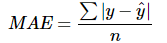


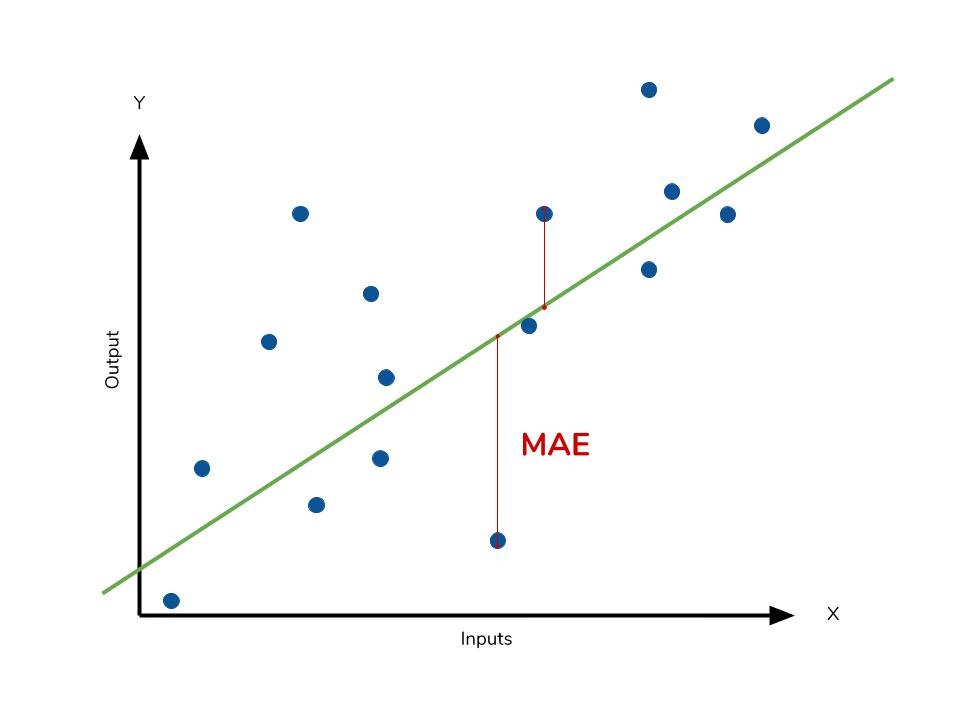

### 📌 코드 설명
* 1줄 : sklearn.linear_model 라이브러리에서 mean_squared_error 호출
* 3줄 : LinearRegression 선언한 reg 변수에 X_train을 입력으로 주어 feature 값에 따른 주택 가격 예측값을 pred_train에 입력받습니다.
* 5줄 : 정답 데이터인 y_train과 모델이 예측한 데이터인 pred_train 데이터를 입력으로 주어 MSE 값을 얻고 mse_train 변수에 선언합니다.

➡️ <u>모델의 mse 값이 약 0.444인 것을 확인 할 수 있습니다.</u>

In [34]:
from sklearn.metrics import mean_squared_error

pred_train = reg.predict(X_train)

mse_train = mean_squared_error(y_train, pred_train)

mse_train

0.444489413533619

### 📌 코드 설명
* 2줄 : 위와 동일하게 X_test를 입력으로 주어 모델의 예측값을 얻습니다.
* 5줄 : 각 실제 정답 값인 y_test값과 모델이 예측한 값인 pred_test 값을 같이 띄워줍니다.


➡️ <u>각 실제 정답 값인 y_test값과 모델이 예측한 값인 pred_test 값을 같이 띄워 어느정도 비슷하게 예측했는지 확인해보는 코드입니다.</u>

In [36]:
# y_test에 대한 예측값 생성
pred_test = reg.predict(X_test)

# y_test와 pred_test를 나란히 비교할 수 있는 데이터프레임 생성
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})

# 데이터프레임 출력
results_df

,Actual,Predicted
20303,1.67400,2.368108
16966,3.54100,2.811773
10623,1.60200,2.765566
6146,1.40800,1.720817
2208,1.07800,1.672938
...,...,...
3263,1.06300,1.237622
11694,3.93700,3.233206
1729,1.31300,2.154467
5087,0.92300,0.855381


# 5. 여러 회귀 모델 

### 📌 코드 설명
* 1~6줄 : 여러 회귀 방법을 호출합니다.
* 9~13줄 : 각 회귀 방법을 각 변수에 선언합니다.
* 15~19줄 : 각 회귀 방법의 모델을 학습합니다.
* 21~25줄 : 각 회귀 모델을 활용해 예측값을 얻습니다.
* 27~31줄 : 각 회귀 모델의 예측값과 실제값을 비교한 mse 값을 얻습니다.
* 33~37줄 : 각 회귀 모델의 mse 값을 출력합니다.


➡️ <u>각각의 회귀 방법의 설명은 이번 프로젝트에선 생략하겠습니다. 결과를 보면 선형회귀보다 XGBoost의 mse값이 큰 차이로 적은 것을 확인할 수 있습니다.</u>

In [42]:
from sklearn.linear_model import LinearRegression   
from sklearn.linear_model import Lasso    
from sklearn.linear_model import Ridge   
from xgboost.sklearn import XGBRegressor  
from lightgbm.sklearn import LGBMRegressor     
from sklearn.metrics import mean_squared_error

## training
reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

mse_train = mean_squared_error(y_train, pred_train)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_train5 = mean_squared_error(y_train, pred_train5)

print("l. Linear Regression mse :", mse_train)
print("2. Lasso mse :", mse_train2)
print("3. Ridge mse :", mse_train3)
print("4. XGBoost mse :", mse_train4)
print("5. LightGBM mse :", mse_train5)

l. Linear Regression mse : 0.444489413533619
2. Lasso mse : 0.9509374412753948
3. Ridge mse : 0.4444894302515966
4. XGBoost mse : 0.07538280047512144
5. LightGBM mse : 0.15585410490066823
